In [59]:
pip install ipympl ipyplot umap-learn albumentations pydot mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import ipyplot as plt2
import seaborn as sns
import pandas as pd

%aimport helper

# Labels
Each training and test example is assigned to one of the following labels:

| Label |	Description  |
|-------|----------------|
|   0   |	T-shirt/top  |
|   1   |	Trouser      |
|   2   |	Pullover     |
|   3   |	Dress        |
|   4   |	Coat         |
|   5   |	Sandal       |
|   6   |	Shirt        |
|   7   |	Sneaker      |
|   8   |	Bag          |
|   9   |	Ankle boot   |


# EDA

## Dataset sample viewing

In [40]:
raw_x = np.load("./data/train/train_images.npy")
raw_y = pd.read_csv("./data/train/train_labels.csv")
label2txt = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
txtlabels = [label2txt[i] for i in raw_y["label"]]
plt2.plot_class_tabs(raw_x, txtlabels, img_width=28, show_url=False, zoom_scale=3)

## Classes mean element vector

In [3]:
class_mean_x = [np.mean(raw_x[raw_y["label"]==i], (0)) for i in range(10)]
plt2.plot_images(class_mean_x)

## Per Class pixel intensity histogram

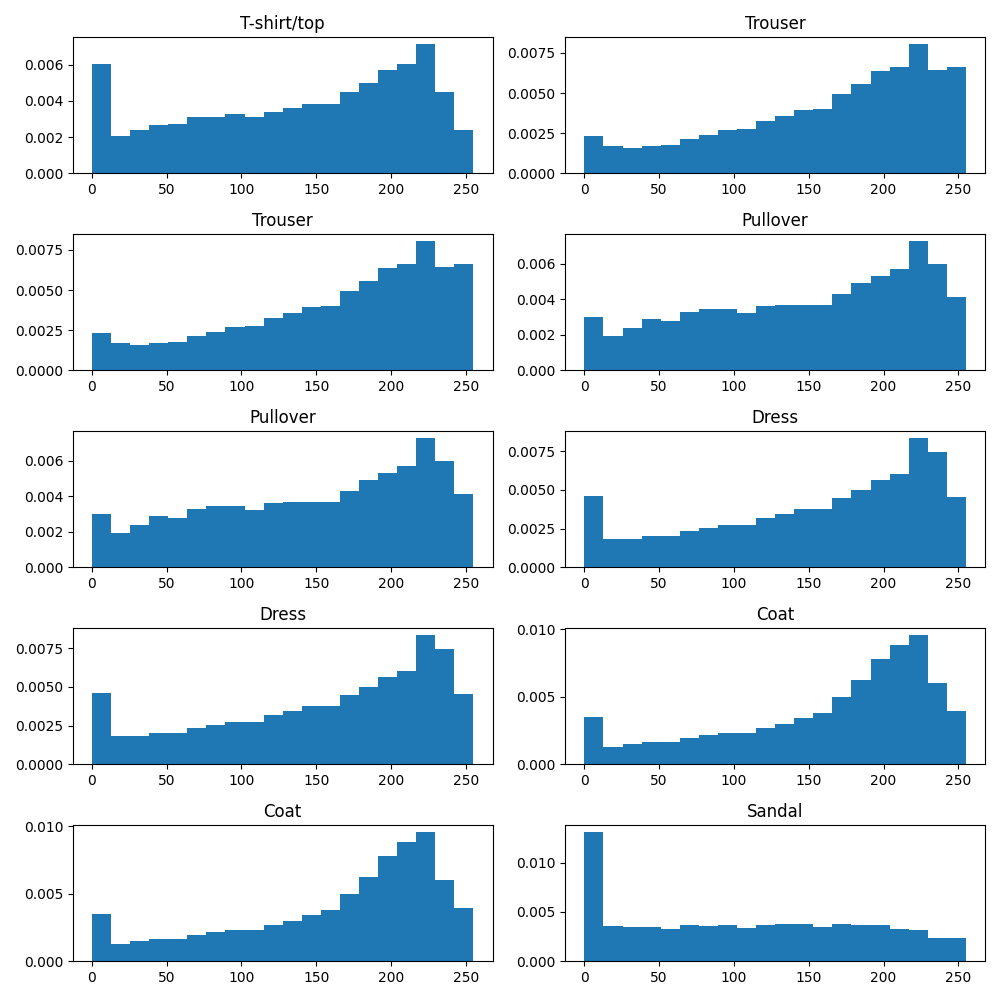

In [5]:
fig, axes = plt.subplots(5, 2, )
fig.set_figwidth(10)
fig.set_figheight(10)
fig.set_tight_layout(True)
for i in range(len(axes)):
    for j in range(len(axes[i])):
        axes[i, j].hist(raw_x[raw_y["label"]==(i+j)].flatten(), bins=20, density=True, range=(0.1, 255))
        axes[i,j].set_title(label2txt[i+j])
        
plt.show()

## PCA Dimension reduction

In [6]:
import sklearn.decomposition as dec

In [7]:
mean_x = np.mean(class_mean_x, 0)
mean_norm_x = raw_x - [mean_x for i in range(len(raw_x))]
flatten_x = np.array([img.flatten() for img in raw_x])

In [8]:
PCA_x = dec.PCA(n_components=3).fit_transform(flatten_x)
pca_df = pd.DataFrame.copy(raw_y)
pca_df["first dim"] = PCA_x[..., 0]
pca_df["second dim"] = PCA_x[..., 1]
pca_df["third dim"] = PCA_x[..., 2]
pca_df["txtlabel"] = txtlabels
pca_df

,label,first dim,second dim,third dim,txtlabel
0,9,-123.993791,1633.074396,-1211.041206,Ankle boot
1,0,1407.928853,-451.641336,-261.027041,T-shirt/top
2,0,-725.910795,-1101.838138,106.154250,T-shirt/top
3,3,31.398664,-981.067672,202.580940,Dress
4,0,804.119258,-1201.168720,-744.377134,T-shirt/top
...,...,...,...,...,...
59995,5,-1725.093422,-41.582509,324.750832,Sandal
59996,1,-27.515977,-1454.424894,-455.664354,Trouser
59997,3,857.750196,-1180.240183,-520.693982,Dress
59998,0,-807.476526,-581.218873,480.319921,T-shirt/top


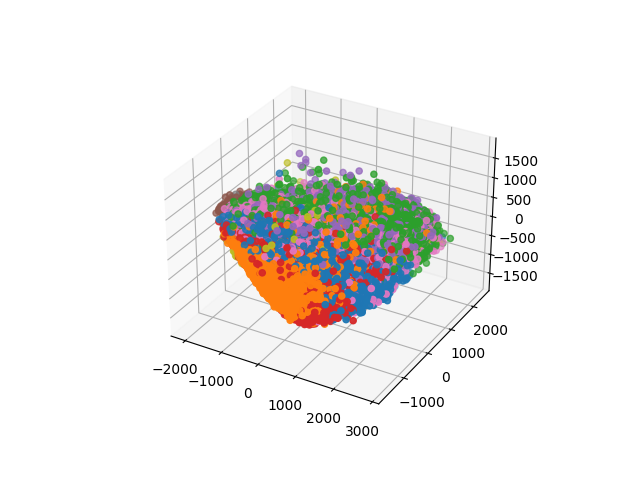

In [9]:
pca_3d_scatter = plt.figure()
ax = pca_3d_scatter.add_subplot(projection='3d')

ax.scatter3D(
    xs=pca_df["first dim"], ys=pca_df["second dim"], zs=pca_df["third dim"],
    c=pca_df["label"], 
    cmap='tab10',   
)
plt.show()

## t-SNE analisys

In [10]:
import sklearn.manifold as mf

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f04e9a57d00>
Traceback (most recent call last):
  File "/home/gullino18/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/gullino18/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/gullino18/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/gullino18/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 1.933s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 455.672474
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.505020
[t-SNE] KL divergence after 1000 iterations: 1.514511


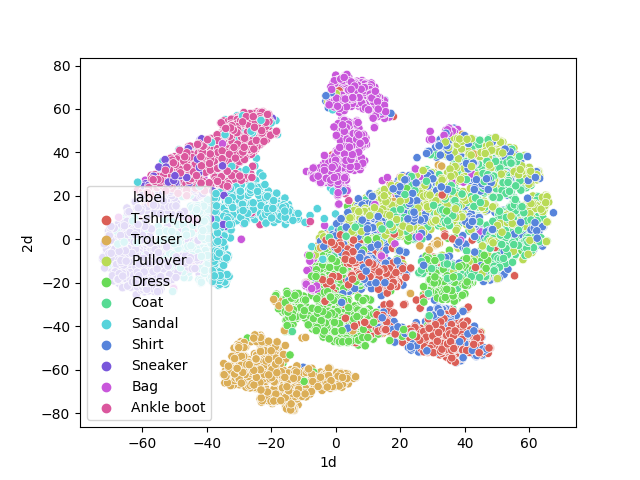

In [11]:
tsne_x = mf.TSNE(n_components=2, verbose=1, perplexity=40).fit_transform(flatten_x[:10000])

tsne_df = pd.DataFrame()
tsne_df["label"] = txtlabels[:10000]
tsne_df["1d"] = tsne_x[..., 0]
tsne_df["2d"] = tsne_x[..., 1]

plt.figure()
sns.scatterplot(
    x="1d", y="2d",
    hue="label",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=tsne_df,

)
plt.show()

## UMap analysis

In [12]:
import umap.umap_ as umap
import umap.plot as umap_plot

In [13]:
mapper = umap.UMAP().fit(flatten_x[:30000])

In [14]:
umap_plot.output_notebook()
hover_data_df = pd.DataFrame({"Class": txtlabels[:30000]})
p = umap_plot.interactive(mapper, labels=txtlabels[:30000], hover_data=hover_data_df, point_size=2, theme='fire')
umap_plot.show(p)

Loading BokehJS ...

# Data Augmentation

In [55]:
import albumentations as A
import random

random.seed(hash("Los buenos caballos y los buenos estudiantes siempre terminan su carrera.") % 2**32)

In [56]:
transform_generico = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussNoise()
])

augmented_images = [transform_generico(image=image)["image"] for image in raw_x]
augmented_x = np.concatenate((raw_x, augmented_images))
augmented_y = np.concatenate((raw_y["label"], raw_y["label"]))


# Entrenamiento de modelos:


In [6]:
from sklearn.metrics import f1_score, precision_score, recall_score
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
from tensorflow.keras import optimizers as opt
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import metrics as mtr
from tensorflow.keras import Sequential
import tensorflow as tf

metrics=['accuracy', 'AUC', mtr.Precision(), mtr.Recall()]

tf.keras.utils.set_random_seed(hash("Los buenos caballos y los buenos estudiantes siempre terminan su carrera.") % 2**32)

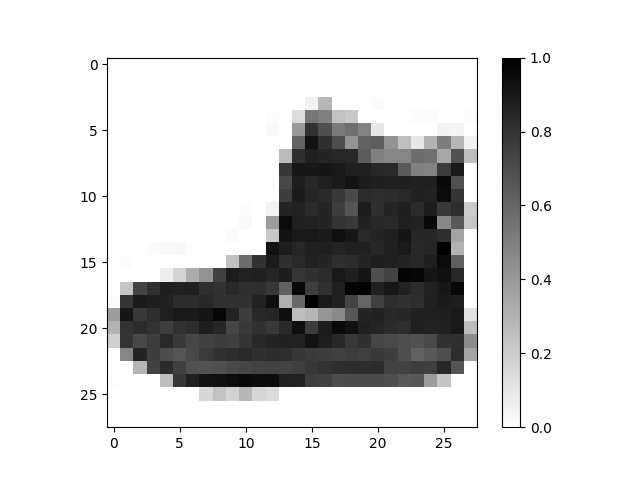

In [45]:
casted_x = np.array(augmented_x, dtype="float32")
normalized_x = casted_x / 255
plt.figure()
plt.imshow(normalized_x[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [46]:
train_y = np.zeros([len(augmented_y), 10])

for i in range(len(augmented_y)):
  train_y[i, augmented_y[i]] = 1

## Simple Softmax models: Base Line


### Categorical Crossentropy

#### SGD optimizer

In [49]:

tf.keras.utils.set_random_seed(hash("Los buenos caballos y los buenos estudiantes siempre terminan su carrera.") % 2**32)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=opt.RMSprop(learning_rate=.001), loss='categorical_crossentropy', metrics=metrics)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 2048)              1607680   
                                                                 
 dense_33 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_34 (Dense)            (None, 10)                20490     
                                                                 
Total params: 5,824,522
Trainable params: 5,824,522
Non-trainable params: 0
_________________________________________________________________


In [50]:
earlyStopCB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, start_from_epoch=8)
LearningSchedulerCB = tf.keras.callbacks.LearningRateScheduler(lambda ep, lr: 0.0005/100**(ep//10))
history = model.fit(x=normalized_x, y=train_y, batch_size=128, epochs=100, validation_split=0.1, callbacks=[earlyStopCB, LearningSchedulerCB])

Epoch 1/100
422/422 [==============================] - 27s 63ms/step - loss: 0.5486 - accuracy: 0.8028 - auc: 0.9819 - precision: 0.8641 - recall: 0.7601 - val_loss: 0.5628 - val_accuracy: 0.7837 - val_auc: 0.9812 - val_precision: 0.8138 - val_recall: 0.7523 - lr: 5.0000e-04
Epoch 2/100
422/422 [==============================] - 27s 65ms/step - loss: 0.3730 - accuracy: 0.8610 - auc: 0.9910 - precision: 0.8894 - recall: 0.8323 - val_loss: 0.4186 - val_accuracy: 0.8552 - val_auc: 0.9882 - val_precision: 0.8823 - val_recall: 0.8212 - lr: 5.0000e-04
Epoch 3/100
422/422 [==============================] - 27s 65ms/step - loss: 0.3271 - accuracy: 0.8766 - auc: 0.9928 - precision: 0.9017 - recall: 0.8550 - val_loss: 0.3450 - val_accuracy: 0.8773 - val_auc: 0.9920 - val_precision: 0.9021 - val_recall: 0.8552 - lr: 5.0000e-04
Epoch 4/100
422/422 [==============================] - 27s 64ms/step - loss: 0.2982 - accuracy: 0.8877 - auc: 0.9938 - precision: 0.9081 - recall: 0.8691 - val_loss: 0.3249

#### RMSprop optimizer

In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.005)
tf.keras.utils.set_random_seed(hash("Los buenos caballos y los buenos estudiantes siempre terminan su carrera.") % 2**32)
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=opt.RMSprop(), loss='categorical_crossentropy', metrics=metrics[0:2])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x=normalized_x, y=train_y, batch_size=32, epochs=100, validation_split=0.05, callbacks=[callback])

Epoch 1/100


2023-04-30 21:56:25.431442: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 178752000 exceeds 10% of free system memory.


1782/1782 [==============================] - 2s 746us/step - loss: 0.5897 - accuracy: 0.7999 - auc: 0.9800 - val_loss: 0.4676 - val_accuracy: 0.8370 - val_auc: 0.9861
Epoch 2/100
1782/1782 [==============================] - 1s 660us/step - loss: 0.4688 - accuracy: 0.8400 - auc: 0.9856 - val_loss: 0.4431 - val_accuracy: 0.8453 - val_auc: 0.9869
Epoch 3/100
1782/1782 [==============================] - 1s 673us/step - loss: 0.4478 - accuracy: 0.8479 - auc: 0.9866 - val_loss: 0.4405 - val_accuracy: 0.8470 - val_auc: 0.9869
Epoch 4/100
1782/1782 [==============================] - 1s 677us/step - loss: 0.4354 - accuracy: 0.8532 - auc: 0.9872 - val_loss: 0.4836 - val_accuracy: 0.8267 - val_auc: 0.9835
Epoch 5/100
1782/1782 [==============================] - 1s 665us/step - loss: 0.4285 - accuracy: 0.8540 - auc: 0.9874 - val_loss: 0.4296 - val_accuracy: 0.8560 - val_auc: 0.9866
Epoch 6/100
1782/1782 [==============================] - 1s 685us/step - loss: 0.4232 - accuracy: 0.8569 - auc: 0.987

#### Adam optimizer

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.005)
tf.keras.utils.set_random_seed(hash("Los buenos caballos y los buenos estudiantes siempre terminan su carrera.") % 2**32)
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=opt.Adam(), loss='categorical_crossentropy', metrics=metrics[0:2])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x=normalized_x, y=train_y, batch_size=32, epochs=100, validation_split=0.05, callbacks=[callback])

Epoch 1/100


2023-04-30 21:56:37.965613: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 178752000 exceeds 10% of free system memory.


1782/1782 [==============================] - 2s 753us/step - loss: 0.6051 - accuracy: 0.7944 - auc: 0.9800 - val_loss: 0.4683 - val_accuracy: 0.8370 - val_auc: 0.9866
Epoch 2/100
1782/1782 [==============================] - 1s 688us/step - loss: 0.4655 - accuracy: 0.8414 - auc: 0.9866 - val_loss: 0.4422 - val_accuracy: 0.8453 - val_auc: 0.9877
Epoch 3/100
1782/1782 [==============================] - 1s 702us/step - loss: 0.4385 - accuracy: 0.8485 - auc: 0.9878 - val_loss: 0.4242 - val_accuracy: 0.8570 - val_auc: 0.9885
Epoch 4/100
1782/1782 [==============================] - 1s 702us/step - loss: 0.4241 - accuracy: 0.8545 - auc: 0.9885 - val_loss: 0.4365 - val_accuracy: 0.8503 - val_auc: 0.9872
Epoch 5/100
1782/1782 [==============================] - 1s 671us/step - loss: 0.4145 - accuracy: 0.8567 - auc: 0.9889 - val_loss: 0.4089 - val_accuracy: 0.8577 - val_auc: 0.9888
Epoch 6/100
1782/1782 [==============================] - 1s 674us/step - loss: 0.4097 - accuracy: 0.8569 - auc: 0.989

#### Adagrad optimizer

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.005)
tf.keras.utils.set_random_seed(hash("Los buenos caballos y los buenos estudiantes siempre terminan su carrera.") % 2**32)
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=opt.Adagrad(), loss='categorical_crossentropy', metrics=metrics[0:2])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(x=normalized_x, y=train_y, batch_size=32, epochs=100, validation_split=0.05, callbacks=[callback])

Epoch 1/100


2023-04-30 21:56:54.689368: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 178752000 exceeds 10% of free system memory.


1782/1782 [==============================] - 2s 751us/step - loss: 1.2779 - accuracy: 0.6132 - auc: 0.9359 - val_loss: 1.0026 - val_accuracy: 0.6783 - val_auc: 0.9620
Epoch 2/100
1782/1782 [==============================] - 1s 672us/step - loss: 0.9402 - accuracy: 0.6965 - auc: 0.9639 - val_loss: 0.8705 - val_accuracy: 0.7140 - val_auc: 0.9690
Epoch 3/100
1782/1782 [==============================] - 1s 690us/step - loss: 0.8518 - accuracy: 0.7201 - auc: 0.9685 - val_loss: 0.8076 - val_accuracy: 0.7353 - val_auc: 0.9720
Epoch 4/100
1782/1782 [==============================] - 1s 685us/step - loss: 0.8029 - accuracy: 0.7351 - auc: 0.9711 - val_loss: 0.7689 - val_accuracy: 0.7433 - val_auc: 0.9738
Epoch 5/100
1782/1782 [==============================] - 1s 697us/step - loss: 0.7705 - accuracy: 0.7453 - auc: 0.9727 - val_loss: 0.7416 - val_accuracy: 0.7537 - val_auc: 0.9751
Epoch 6/100
1782/1782 [==============================] - 1s 699us/step - loss: 0.7464 - accuracy: 0.7525 - auc: 0.973

#### Adamax optimizer

In [27]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.005)
tf.keras.utils.set_random_seed(hash("Los buenos caballos y los buenos estudiantes siempre terminan su carrera.") % 2**32)
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=opt.Adamax(), loss='categorical_crossentropy', metrics=metrics[0:2])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x=normalized_x, y=train_y, batch_size=32, epochs=100, validation_split=0.05, callbacks=[callback])

Epoch 1/100
1782/1782 [==============================] - 2s 768us/step - loss: 0.7265 - accuracy: 0.7591 - auc: 0.9742 - val_loss: 0.5472 - val_accuracy: 0.8170 - val_auc: 0.9839
Epoch 2/100
1782/1782 [==============================] - 1s 675us/step - loss: 0.5304 - accuracy: 0.8242 - auc: 0.9841 - val_loss: 0.4863 - val_accuracy: 0.8363 - val_auc: 0.9869
Epoch 3/100
1782/1782 [==============================] - 1s 683us/step - loss: 0.4908 - accuracy: 0.8350 - auc: 0.9859 - val_loss: 0.4573 - val_accuracy: 0.8403 - val_auc: 0.9880
Epoch 4/100
1782/1782 [==============================] - 1s 677us/step - loss: 0.4688 - accuracy: 0.8427 - auc: 0.9869 - val_loss: 0.4441 - val_accuracy: 0.8480 - val_auc: 0.9884
Epoch 5/100
1782/1782 [==============================] - 1s 707us/step - loss: 0.4554 - accuracy: 0.8459 - auc: 0.9874 - val_loss: 0.4321 - val_accuracy: 0.8473 - val_auc: 0.9890
Epoch 6/100
1782/1782 [==============================] - 1s 688us/step - loss: 0.4456 - accuracy: 0.8490 

## Submissions

### 0.90420

In [52]:
tf.keras.utils.set_random_seed(hash("Los buenos caballos y los buenos estudiantes siempre terminan su carrera.") % 2**32)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=opt.RMSprop(learning_rate=.001), loss='categorical_crossentropy', metrics=metrics)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 512)               401920    
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_31 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_15 (Dropout)        (None, 1024)              0         
                                                     

In [53]:
earlyStopCB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, start_from_epoch=8)
LearningSchedulerCB = tf.keras.callbacks.LearningRateScheduler(lambda ep, lr: 0.0005/10**(ep//5))
history = model.fit(x=normalized_x, y=train_y, batch_size=128, epochs=100, validation_split=0.1, callbacks=[earlyStopCB, LearningSchedulerCB])

Epoch 1/100
844/844 [==============================] - 19s 22ms/step - loss: 0.4839 - accuracy: 0.8301 - auc: 0.9845 - precision_1: 0.8664 - recall_1: 0.8152 - val_loss: 0.3784 - val_accuracy: 0.8674 - val_auc: 0.9901 - val_precision_1: 0.8867 - val_recall_1: 0.8468 - lr: 5.0000e-04
Epoch 2/100
844/844 [==============================] - 18s 21ms/step - loss: 0.3435 - accuracy: 0.8734 - auc: 0.9919 - precision_1: 0.8957 - recall_1: 0.8534 - val_loss: 0.3684 - val_accuracy: 0.8618 - val_auc: 0.9909 - val_precision_1: 0.8845 - val_recall_1: 0.8413 - lr: 5.0000e-04
Epoch 3/100
844/844 [==============================] - 18s 21ms/step - loss: 0.3051 - accuracy: 0.8861 - auc: 0.9935 - precision_1: 0.9050 - recall_1: 0.8693 - val_loss: 0.3385 - val_accuracy: 0.8721 - val_auc: 0.9923 - val_precision_1: 0.8901 - val_recall_1: 0.8567 - lr: 5.0000e-04
Epoch 4/100
844/844 [==============================] - 18s 21ms/step - loss: 0.2816 - accuracy: 0.8951 - auc: 0.9944 - precision_1: 0.9117 - recall_

### 0.90280

In [ ]:
tf.keras.utils.set_random_seed(hash("Los buenos caballos y los buenos estudiantes siempre terminan su carrera.") % 2**32)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=opt.RMSprop(learning_rate=.001), loss='categorical_crossentropy', metrics=metrics)

In [ ]:
earlyStopCB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, start_from_epoch=8)
LearningSchedulerCB = tf.keras.callbacks.LearningRateScheduler(lambda ep, lr: 0.0005/100**(ep//10))
history = model.fit(x=normalized_x, y=train_y, batch_size=128, epochs=100, validation_split=0.1, callbacks=[earlyStopCB, LearningSchedulerCB])

### 0.90320

In [ ]:
tf.keras.utils.set_random_seed(hash("Los buenos caballos y los buenos estudiantes siempre terminan su carrera.") % 2**32)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=opt.RMSprop(learning_rate=.001), loss='categorical_crossentropy', metrics=metrics)

In [ ]:
earlyStopCB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, start_from_epoch=8)
LearningSchedulerCB = tf.keras.callbacks.LearningRateScheduler(lambda ep, lr: 0.0005/100**(ep//10))
history = model.fit(x=normalized_x, y=train_y, batch_size=128, epochs=100, validation_split=0.1, callbacks=[earlyStopCB, LearningSchedulerCB])

## Submission generator

In [58]:
submission = pd.DataFrame()
data = np.load("./data/test/test_images.npy")/255
submission["id"] = np.arange(len(data))
submission["Category"] = np.argmax(model.predict(data), (1))
submission.to_csv("submission.csv", index=False)


313/313 [==============================] - 1s 2ms/step


In [71]:
import keras
import matplotlib.colors as mcolors

In [58]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [61]:
from mlxtend.plotting import plot_decision_regions

25393/25393 [==============================] - 17s 677us/step


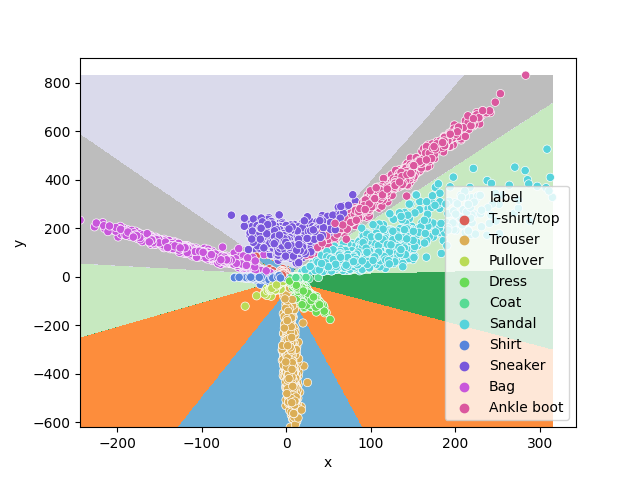

In [89]:
extractor = keras.Model(inputs=model.input,
                        outputs=model.layers[-2].output)
bidim_data = extractor.predict(normalized_x)
bidim_data_df = pd.DataFrame()
bidim_data_df["x"] = bidim_data[...,0][:10000]
bidim_data_df["y"] = bidim_data[...,1][:10000]
bidim_data_df["label"] = txtlabels[:10000]

extractor_softmax = keras.Model(inputs=model.layers[-1].input,
                        outputs=model.layers[-1].output)
x1_min = np.min(bidim_data_df["x"])
x1_max = np.max(bidim_data_df["x"])
x2_min = np.min(bidim_data_df["y"])
x2_max = np.max(bidim_data_df["y"])

g = np.meshgrid(np.arange(x1_min,x1_max, 1), np.arange(x2_min,x2_max, 1))
positions = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis=1)

aver = np.argmax(extractor_softmax.predict(positions), (1))
aver = np.reshape(aver, g[0].shape)

plt.figure()
contour_plot = plt.contourf(g[0], g[1], aver, cmap='tab20c')
sns.scatterplot(
    x="x", y="y",
    hue="label",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=bidim_data_df,

)

plt.show()

In [2]:
extractor = keras.Model(inputs=model.input,
                        outputs=model.layers[-2].output)
bidim_data = extractor.predict(normalized_x)
bidim_data_df = pd.DataFrame()
bidim_data_df["x"] = bidim_data[...,0][:10000]
bidim_data_df["y"] = bidim_data[...,1][:10000]
bidim_data_df["label"] = txtlabels[:10000]
plt.figure()
sns.scatterplot(
    x="x", y="y",
    hue="label",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=bidim_data_df,

)
plt.show()
# plot_decision_regions(flatten_x, raw_y["label"].values, filler_feature_values, clf=model, legend=2)

NameError: name 'keras' is not defined

[]

https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/